# ANN BASICS | WEIGHTS, BIASES, ACTIVATION FUNCTIONS

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

# Bank Customer Churn Prediction | ANNs Basics (Classification Case-study)

## Data Importing & Inspecting

In [2]:
df = pd.read_csv('datasets/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preprocessing

##### Selecting Data

In [3]:
X = df.iloc[:, 3:-1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [4]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

##### Encoding Data

In [5]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [6]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [7]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

##### Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Scaling Data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Artificial Neural Network (ANN) Model

TensorFlow Playground: https://playground.tensorflow.org/

##### Model Building 

In [31]:
import tensorflow.keras

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

In [56]:
ann = Sequential()
ann.add(Dense(units=50)) # 1st Hidden Layer
ann.add(LeakyReLU())
ann.add(Dense(units=50)) # 2nd Hidden Layer
ann.add(LeakyReLU())
ann.add(Dense(units=1, activation='sigmoid')) # Output Layer

In [57]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Model Training 

In [58]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 901us/step - loss: 0.4475 - accuracy: 0.8024
Epoch 2/100
250/250 [==============================] - 0s 928us/step - loss: 0.4006 - accuracy: 0.8329
Epoch 3/100
250/250 [==============================] - 0s 946us/step - loss: 0.3700 - accuracy: 0.8493
Epoch 4/100
250/250 [==============================] - 0s 977us/step - loss: 0.3536 - accuracy: 0.8512
Epoch 5/100
250/250 [==============================] - 0s 961us/step - loss: 0.3479 - accuracy: 0.8547
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8587
Epoch 7/100
250/250 [==============================] - 0s 945us/step - loss: 0.3438 - accuracy: 0.8566
Epoch 8/100
250/250 [==============================] - 0s 934us/step - loss: 0.3407 - accuracy: 0.8593
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8590
Epoch 10/100
250/250 [==============================] - 0s 952us/step - loss:

250/250 [==============================] - 0s 889us/step - loss: 0.3016 - accuracy: 0.8755
Epoch 81/100
250/250 [==============================] - 0s 961us/step - loss: 0.3009 - accuracy: 0.8735
Epoch 82/100
250/250 [==============================] - 0s 968us/step - loss: 0.3025 - accuracy: 0.8730
Epoch 83/100
250/250 [==============================] - 0s 872us/step - loss: 0.3025 - accuracy: 0.8712
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8754
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8746
Epoch 86/100
250/250 [==============================] - 0s 948us/step - loss: 0.2974 - accuracy: 0.8767
Epoch 87/100
250/250 [==============================] - 0s 869us/step - loss: 0.3006 - accuracy: 0.8733
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8734
Epoch 89/100
250/250 [==============================] - 0s 989us/step - loss: 0.296

##### Model Prediction

In [16]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))

1/1 [==============================] - 0s 87ms/step


array([[0.02248495]], dtype=float32)

In [17]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) >= 0.5)

1/1 [==============================] - 0s 15ms/step
[[False]]


In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 740us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


##### Model Evaluation 

In [37]:
ann.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [38]:
ann.history.history

{'loss': [0.38969686627388,
  0.38516825437545776,
  0.38149020075798035,
  0.3780178129673004,
  0.3752245604991913,
  0.37205377221107483,
  0.36939144134521484,
  0.3665560781955719,
  0.36444932222366333,
  0.36235541105270386,
  0.36052489280700684,
  0.3586534559726715,
  0.35746705532073975,
  0.35629069805145264,
  0.3552294373512268,
  0.3540727496147156,
  0.35303547978401184,
  0.35275810956954956,
  0.35192984342575073,
  0.35108381509780884,
  0.35031959414482117,
  0.35003265738487244,
  0.34963440895080566,
  0.34871071577072144,
  0.3481709659099579,
  0.3479345738887787,
  0.3476966619491577,
  0.3466971218585968,
  0.346949964761734,
  0.3464359939098358,
  0.34636789560317993,
  0.3459649682044983,
  0.3449617326259613,
  0.3453439474105835,
  0.34490111470222473,
  0.344728022813797,
  0.3437706530094147,
  0.34403032064437866,
  0.3437080383300781,
  0.34326884150505066,
  0.34316515922546387,
  0.3429049551486969,
  0.3426232635974884,
  0.3429255783557892,
  0.34

<AxesSubplot:>

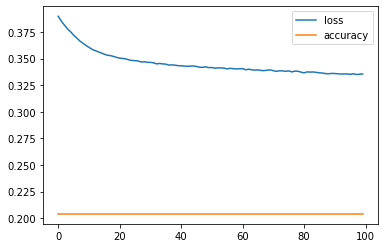

In [39]:
pd.DataFrame(ann.history.history).plot()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1529   66]
 [ 205  200]]


0.8645

##### Model Saving 

In [ ]:
ann.save('churn.h5')

In [ ]:
from keras.models import load_model
model = load_model('churn.h5')

In [ ]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

==========

# THANK YOU!